In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [4]:
# Load digits data
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
target = digits.target

In [5]:
data_subset = data[np.logical_or(target == 0, target == 1)]
target_subset = target[np.logical_or(target == 0, target == 1)]

In [6]:
# Create train/test sets
from sklearn.cross_validation import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.33, random_state=1
)

# PCA

[[  1.77484909e-19   1.73094651e-02   2.23428835e-01   1.35913304e-01
    3.30323092e-02   9.66340844e-02   8.32943805e-03  -2.26900082e-03
    3.20516495e-04   1.19308905e-01   2.44451676e-01  -1.48512745e-01
    4.67319410e-02   2.17740744e-01   1.48136776e-02  -4.47779518e-03
    4.94136398e-05   7.95419375e-02  -8.33951454e-02  -2.15915342e-01
    1.72126801e-01   1.63712098e-01  -2.86444452e-02  -4.23251803e-03
   -9.85488574e-05  -6.42319144e-02  -2.54093316e-01   3.56771026e-02
    2.09462569e-01   4.31311420e-02  -5.13118688e-02  -2.13422732e-04
    0.00000000e+00  -1.59950883e-01  -3.68690774e-01  -1.64406827e-01
   -8.52007908e-02  -3.72982855e-02  -2.15866980e-02   0.00000000e+00
   -1.28865585e-03  -1.06945287e-01  -3.03067457e-01  -2.47813041e-01
   -2.09637296e-01  -1.22325219e-02   3.69458497e-02  -1.61485028e-03
   -6.93023548e-04   8.35144239e-03   5.58598986e-02  -9.30534169e-02
   -1.07387720e-01   1.37734565e-01   6.32879466e-02  -9.61671077e-04
   -9.55079131e-06  

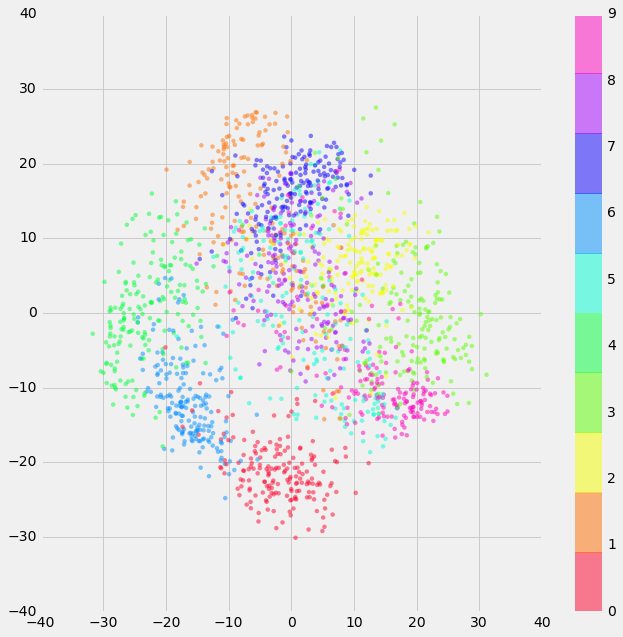

In [7]:
from sklearn.decomposition import PCA

# Run PCA on digits
pca = PCA()
Xproj = pca.fit_transform(data)

# Plot first two principal components
figure, ax = plt.subplots(figsize=(10,10))
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
figure.colorbar(s, ax=ax)

# Look at first two components
print pca.components_[:2]

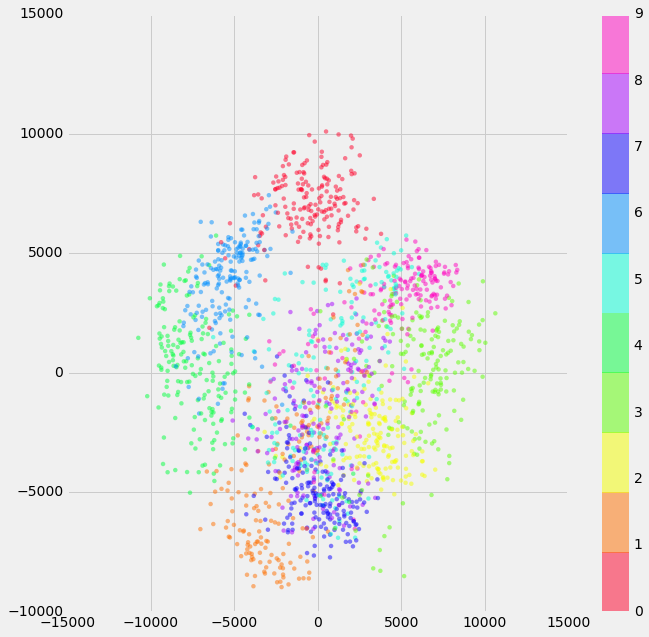

In [9]:
from sklearn.decomposition import KernelPCA

# Run KernalPCA on digits
kpca = KernelPCA(kernel='poly', degree=4, gamma=.009, coef0=120)
Xproj = kpca.fit_transform(data)

# Plot first two principal components
figure, ax = plt.subplots(figsize=(10,10))
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
figure.colorbar(s, ax=ax)

# Naive Bayes Classifier

In [10]:
# Using Stan's code
from lib.naive_bayes import trainNaiveBayes, classifyNaiveBayes, trainNaiveBayesDiscrete, classifyNaiveBayesDiscrete

In [11]:
# Create dataframe compatible with classifier

# Use only 0/1 which is what the code expects
data_train, data_test, target_train, target_test = train_test_split(
    data_subset, target_subset, test_size=0.33, random_state=1
)

# Create dataframes with the correct format [(y,x1,x2...),...]
df_train = pd.DataFrame(np.concatenate((target_train.reshape(target_train.shape[0],1), data_train), axis=1))
df_test = pd.DataFrame(np.concatenate((target_test.reshape(target_test.shape[0],1), data_test), axis=1))

In [12]:
# Run discrete classifier and report

dp=trainNaiveBayes(df_train)
C=classifyNaiveBayes(df_test,dp)
print "Classification accuracy for test set =", 1.0*sum(C==df_test[0])/len(C)

Classification accuracy for test set = 0.983193277311


In [13]:
# Using scikit learn

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred = gnb.fit(data_train, target_train).predict(data_test)
print "(0/1) Classification accuracy for test set =", 1.*sum(y_pred == target_test)/len(target_test)

#Scikit's implementation can also support more than 2 labels
data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.33, random_state=1
)

gnb = GaussianNB()
y_pred = gnb.fit(data_train, target_train).predict(data_test)
print "(0-9) Classification accuracy for test set =", 1.*sum(y_pred == target_test)/len(target_test)

(0/1) Classification accuracy for test set = 0.974789915966
(0-9) Classification accuracy for test set = 0.826599326599


In [14]:
# Multinomial works better for discrete integer y
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
y_pred = mnb.fit(data_train, target_train).predict(data_test)
print "(0-9) Classification accuracy for test set =", 1.*sum(y_pred == target_test)/len(target_test)

(0-9) Classification accuracy for test set = 0.895622895623


# Support Vector Machines

In [15]:
from sklearn import svm

data_train, data_test, target_train, target_test = train_test_split(
    data_subset, target_subset, test_size=0.33, random_state=1
)

# Linear Kernel
clf = svm.SVC(kernel='linear')
clf.fit(data_train, target_train)

y_pred = clf.predict(data_train)
print "Accuracy in training set:", 1.*sum(y_pred == target_train)/len(target_train)

y_pred = clf.predict(data_test)
print "Accuracy in training set:", 1.*sum(y_pred == target_test)/len(target_test)

Accuracy in training set: 1.0
Accuracy in training set: 1.0


In [16]:
# That worked pretty well.  Let's try it on a subset of the pixels.

# Use only the first n pixels of each digit.
n = 10

clf = svm.SVC(kernel='linear')
clf.fit(data_train[:,:n], target_train)

y_pred = clf.predict(data_train[:,:n])
print "Accuracy in training set:", 1.*sum(y_pred == target_train)/len(target_train)

y_pred = clf.predict(data_test[:,:n])
print "Accuracy in training set:", 1.*sum(y_pred == target_test)/len(target_test)

Accuracy in training set: 0.692946058091
Accuracy in training set: 0.638655462185


In [17]:
# Now Try poly kernel with default settings to see if we can improve.

# Use only the first n pixels of each digit.
n = 10

clf = svm.SVC(kernel='poly')
clf.fit(data_train[:,:n], target_train)

y_pred = clf.predict(data_train[:,:n])
print "Accuracy in training set:", 1.*sum(y_pred == target_train)/len(target_train)

y_pred = clf.predict(data_test[:,:n])
print "Accuracy in training set:", 1.*sum(y_pred == target_test)/len(target_test)

Accuracy in training set: 0.829875518672
Accuracy in training set: 0.72268907563


# Neural Networks

In [18]:
# Let's use this nice, friendly python library instead of the monster we used in class
# http://pybrain.org/

from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets.classification import ClassificationDataSet
from pybrain.structure import TanhLayer, SoftmaxLayer
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.utilities import percentError

# Create a network with 64 inputs, 16 hidden units and 10 outputs (for each digit 0-9)
net = buildNetwork(data.shape[1], 32, 10, hiddenclass=SoftmaxLayer)

data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.33, random_state=1
)

# Create a test dataset for classification
ds_train = ClassificationDataSet(data_train.shape[1])

# Add the data to the dataset
for i in range(len(data_train)):
    ds_train.addSample(data_train[i], target_train[i])
    
# Convert the samples to do classification.
# This converts targets from a single digit n to a binary output of length n.
# For example, 4 -> (0,0,0,0,1,0,0,0,0,0)
# This is prefereable when doing classification with nerual networks.
ds_train._convertToOneOfMany()
    

# Repeat for test
ds_test = ClassificationDataSet(data_test.shape[1])

for i in range(len(data_test)):
    ds_test.addSample(data_test[i], target_test[i])
    
ds_test._convertToOneOfMany()


# Create the trainer
trainer = BackpropTrainer(net, ds_train)

In [19]:
# Train for a while and report testing accuracy
for i in range(10):
    trainer.trainEpochs(10)
    print "Accuracy:", 1.*sum(net.activateOnDataset(ds_test).argmax(1) == target_test)/len(target_test)
#trainer.trainUntilConvergence()

Accuracy: 0.757575757576
Accuracy: 0.816498316498
Accuracy: 0.840067340067
Accuracy: 0.845117845118
Accuracy: 0.858585858586
Accuracy: 0.86531986532
Accuracy: 0.875420875421
Accuracy: 0.87037037037
Accuracy: 0.878787878788
Accuracy: 0.877104377104
